# Metodo experimental

Se empleó: 1 rollo de hilo, una cinta métrica, 1 fotocompuerta de sensibilidad
$0.001\ s$, 1 transportador, una base para pendulos y 3 masas con pesos $m_1 = (5.4 \pm 0.1)\ g$, $m_2 = (45.0 \pm 0.1)\ g$ y $m_3 = (1.6 \pm 0.1)\ g$. La base para la colocación del péndulo contaba con marcas para diferentes grados, donde la veracidad de las mismas se comprobaron utilizando un transportador y propiedades trigonométricas.

Entre las diferentes variables que influyen en el periodo de un péndulo, las que se
pueden estudiar en el laboratorio son la longitud del hilo, la amplitud (grados con respecto a
la posición de reposo) y la masa colgante. Donde cada variable se midió con la cinta métrica
(sensibilidad de $1\ mm$), las marcas angulares (sensibilidad de $1\ mm$), respectivamente. Por su
parte, el periodo de oscilación se midió utilizando la fotocompuerta con sensibilidad de $0.01\ ms$.

Para la ejecución de la medida del periodo, se determinó que el momento ideal para
tomar la medida con la fotocompuerta es posterior de una oscilación completa. De esta
manera se reducen las incertezas provocadas al soltar la masa. Adicionalmente, y por la
naturaleza oscilatoria de un péndulo, se posicionó la fotocompuerta en un punto arbitrario del
movimiento y no se cambió durante todo el experimento.

Una vez hecho todos los preparativos, se determinó que la forma ideal de hacer las
medidas del periodo que provoque la menor cantidad de perturbaciones en el sistema fue:

1. Variando la masa. Se mantuvo constante la longitud del hilo en $76,5 cm$ (del punto de apoyo al centro de masa de cada combinación) y con una amplitud de 5 grados. Debido a que solo se contaban con 3 masas, se utilizaron las combinaciones $m_1$, $m_2$, $m_1 + m_3$ y $m_2 + m_3$. Otras combinaciones mostraban roces o impactos del péndulo con la fotocompuerta, y no se utilizó $m_3$ debido a que su masa era comparable a la masa del hilo. El orden de las masas fue de menor a mayor.

2. Variando la amplitud. Continuando con la mayor combinación de masas, se procedió a variar las amplitudes con los ángulos 2º, 3º, 4º, 5º y 10º con respecto a la vertical manteniendo las condiciones anteriores.

3. Variando la longitud del hilo. $L_1= 64\ cm$ ; $L_2=66.5\ cm$ ; $L_3= 69.5\ cm$ ; $L_4=76.5\ cm$ ; $L_5=72\ cm$ (se toma la distancia desde el punto de agarre del hilo, hasta el centro de la masa).

# Resultados

Se utilizó la misma longitud ($76.5\ cm$) y la misma amplitud (5°) para ver si el periodo del
péndulo variaba en respuesta a distintas masas. Se encontró que la masa no es una variable
que afecte a la periodicidad.

* Gráfica del periodo del péndulo frente a distintas masas (Figura 1).Los puntos representan los datos experimentales presentados en la tabla de la (Figura 2).

In [2]:
# Para manejo de numeros
import numpy as np 
# Para tablas de datos
import pandas as pd
# Para Graficar
import matplotlib.pyplot as plt
# Estilo de las graficas
import seaborn as sns
sns.set()
plt.rcParams['text.usetex'] = True

In [3]:
# Creamos funcion de utilidad de estadistica
def stats(arr):
    """Funcion para calculo estadistico basico.
    
    Input :
    -------
        arr: np.array. Vector con los datos
        
    Return :
    --------
        tuple : Conjunto de datos de interes
    """
    # Calculamos la suma de la diferencia de los cuadrados con el promedio
    s2 = np.sum((arr.mean() - arr)**2)
    # Obtenemos la desviacion estandar de la muestra
    S = np.sqrt(s2 / (arr.shape[0] - 1))
    # Determinamos el numero optimo,
    # 0.0001 corresponde a la sensibilidad del instrumento
    N = (S / 0.0001)**2
    # Calculamos la desviacion estandar de la poblacion
    sigma = S/np.sqrt(arr.shape[0])
    # Suma cuadratica de las incertidumbres (instrumental y estadistica)
    d = np.sqrt(0.0001**2 + sigma**2)
    
    return arr.mean(), S, N, sigma, d

In [4]:
# Cargamos los datos para los diferentes valores de masas
m_5 = np.array([1.5017, 1.5022, 1.5057, 1.5036, 1.5046, 1.5015, 1.5025, 1.5010, 1.5018, 1.5025])
m_54 = m_5
m_45 = np.array([1.4972, 1.4963, 1.4991, 1.4975, 1.5036, 1.4986, 1.5014, 1.4964, 1.5009, 1.4972])
m_7 = np.array([1.4998, 1.4808, 1.4930, 1.4901, 1.4943, 1.4926, 1.4994, 1.4977, 1.4957, 1.4966])
m_465 = np.array([1.5036, 1.5029, 1.5033, 1.5020, 1.5034, 1.5030, 1.5011, 1.5010, 1.5022])

# Unimos todas en un array
masas = [m_54, m_45, m_7, m_465]

# Creamos tabla de datos
df_m = pd.DataFrame(columns = ["Variable", "Promedio", "Varianza", "N optimo", "D. std", "Incertidumbre"])
# Definimos una variable con las masas medidos
ms = [5.4, 45, 7, 46.5]
# Llenamos la tabla
for i, m in enumerate(masas):
    df_m.loc[i, "Variable"] = ms[i]
    df_m.loc[i, "Promedio":] = stats(m)
    
tmp  = df_m[["Variable", "Promedio"]].copy()
tmp.columns = ["Masa (g)", "Periodo (s)"]
tmp.sort_values("Masa (g)")
# Si la quieren en un excel, descomentar abajo
#df_m.to_excel("Datos por masas.xlsx")

,Masa (g),Periodo (s)
0,5.4,1.50271
2,7,1.494
1,45,1.49882
3,46.5,1.5025


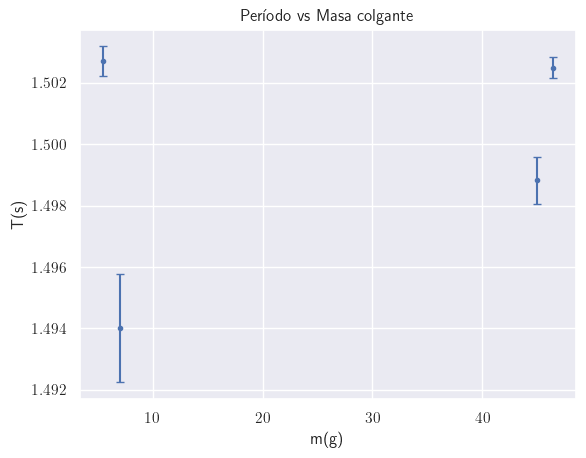

In [5]:
# Graficamos
plt.errorbar(df_m["Variable"], df_m["Promedio"], df_m["Incertidumbre"], 
             fmt = "o", ms = 3, capsize = 3)
plt.title(r"Per\'iodo vs Masa colgante")
plt.xlabel(r"m(g)")
plt.ylabel(r"T(s)")
plt.show()
#plt.savefig("PvsM.jpg")

Se utilizó una misma masa ($5.4\ g$) y una misma longitud ($76.5\ cm$) para determinar si la
amplitud es una variable qué afecta al periodo del péndulo, y se determinó qué no lo es.

* Gráfica del periodo del péndulo frente a distintas amplitudes (Figura 3). Los puntos representan los datos experimentales presentados en la tabla (Figura 4)

In [6]:
# Cargamos los datos
m_2 = np.array([1.4881, 1.5006, 1.5021, 1.4981, 1.4951])
m_3 = np.array([1.4957, 1.5002, 1.5000, 1.4998, 1.4988, 1.4993, 1.4998, 1.4995])
m_4 = np.array([1.4953, 1.5031, 1.5029, 1.5027, 1.5012, 1.5050, 1.4998, 1.5046])
m_10 = np.array([1.5092, 1.5129, 1.5099, 1.5120, 1.5122, 1.5114, 1.5116, 1.5121, 1.5117])

# Unimos todos en una sola variable
degrees = [m_2, m_3, m_4, m_5, m_10]

In [7]:
# Creamos tabla de datos
amp = pd.DataFrame(columns = ["Variable", "Promedio", "Varianza", "N optimo", "D. std", "Incertidumbre"])
# Definimos una variable con los angulos medidos
angulos = [2, 3, 4, 5, 10]
# Llenamos la tabla
for i, m in enumerate(degrees):
    amp.loc[i, "Variable"] = angulos[i]
    amp.loc[i, "Promedio":] = stats(m)
    
tmp  = amp[["Variable", "Promedio"]].copy()
tmp.columns = ["Amplitud (\N{DEGREE SIGN})", "Periodo (s)"]
tmp.sort_values("Amplitud (\N{DEGREE SIGN})")
# Si la quieren en un excel, descomentar abajo
#amp.to_excel("Datos por amplitud.xlsx")

,Amplitud (°),Periodo (s)
0,2,1.4968
1,3,1.499137
2,4,1.501825
3,5,1.50271
4,10,1.511444


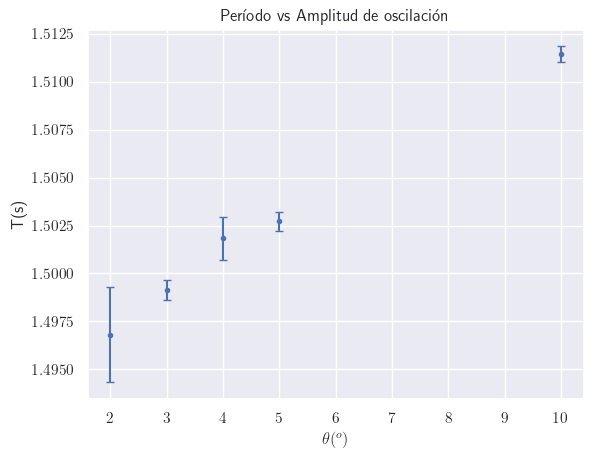

In [8]:
# Graficamos
plt.errorbar(amp["Variable"], amp["Promedio"], amp["Incertidumbre"], 
             fmt = "o", ms = 3, capsize = 3)
plt.title(r"Per\'iodo vs Amplitud de oscilaci\'on")
plt.xlabel(r"$\theta (^o)$")
plt.ylabel(r"T(s)")
plt.show()
#plt.savefig("PvsA.jpg")

En esta gráfica podemos observar que la amplitud de oscilacion, dentro del intervalo probado,
no influye en el periodo. Luego, se utilizó una misma masa ($45\ g$) y una misma amplitud
(5°) para determinar si la longitud es una variable qué afecte al periodo del tiempo y se
determinó qué sí lo es.

* Gráfica del periodo frente a la longitud del péndulo ( Figura 5 ). Los puntos representan los datos experimentales presentados en la tabla (Figura 6). Es importante destacar que las barras de incertezas son más pequeñas que los puntos, el diámetro del punto representa su incerteza.

In [9]:
l1 = m_45
l2 = np.array([1.3926, 1.3948, 1.3928, 1.3943, 1.3934, 1.3919, 1.3906, 1.3943, 1.3949, 1.3960])
l3 = np.array([1.3332, 1.3340, 1.3352, 1.3335, 1.3343, 1.3346, 1.3358, 1.3350, 1.3361, 1.3341])
l4 = np.array([1.2715, 1.2746, 1.2079, 1.2722, 1.2661, 1.2683, 1.2677, 1.2703, 1.2725, 1.2689])
l5 = np.array([1.2005, 1.2001, 1.1999, 1.1987, 1.2036, 1.2002, 1.1986, 1.1981, 1.2002, 1.1865])

ls = [l1, l2, l3, l4, l5]

# Creamos tabla de datos
L = pd.DataFrame(columns = ["Variable", "Promedio", "Varianza", "N optimo", "D. std", "Incertidumbre"])
# Definimos una variable con los angulos medidos
Ls = [76.5, 72, 69.5, 66.7, 64]
# Llenamos la tabla
for i, m in enumerate(ls):
    L.loc[i, "Variable"] = Ls[i]
    L.loc[i, "Promedio":] = stats(m)
    
tmp = L[['Variable', 'Promedio']].copy()
tmp.columns = ['Longitud (cm)', 'Periodo (s)']
tmp
# Si la quieren en un excel, descomentar abajo
#L.to_excel("Datos por longitudes.xlsx")

,Longitud (cm),Periodo (s)
0,76.5,1.49882
1,72,1.39356
2,69.5,1.33458
3,66.7,1.264
4,64,1.19864


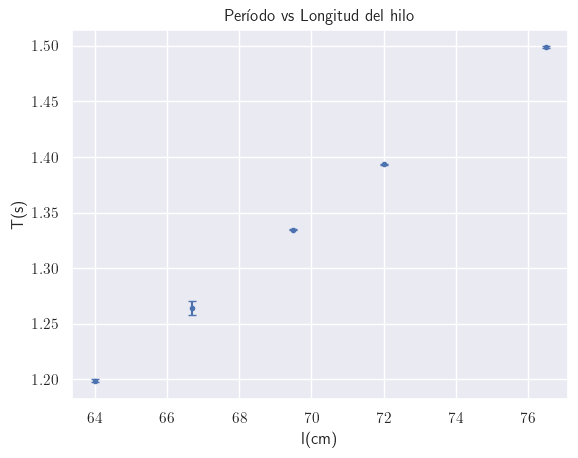

In [10]:
# Graficamos
plt.errorbar(L["Variable"], L["Promedio"], L["Incertidumbre"], 
             fmt = "o", ms = 3, capsize = 3)
plt.title(r"Per\'iodo vs Longitud del hilo")
plt.xlabel(r"l(cm)")
plt.ylabel(r"T(s)")
plt.show()
#plt.savefig("PvsL.jpg")

Como en la anterior los errores son tapados por el tamano del punto, hacemos un ajuste para eliminar las mismas.

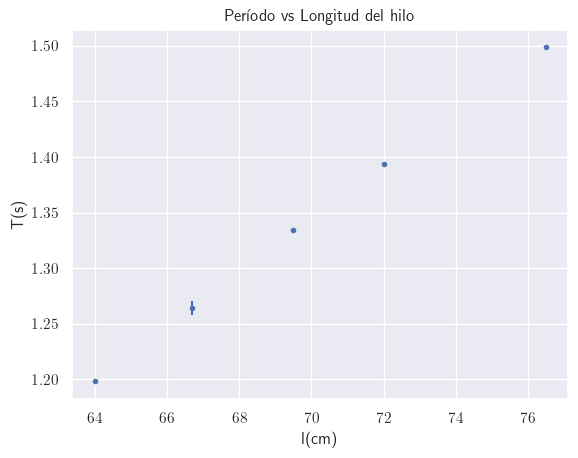

In [11]:
# Graficamos
plt.errorbar(L["Variable"], L["Promedio"], yerr = L["Incertidumbre"], 
             fmt = "o", ms = 3, capsize = 0)
plt.title(r"Per\'iodo vs Longitud del hilo")
plt.xlabel(r"l(cm)")
plt.ylabel(r"T(s)")
plt.show()
#plt.savefig("PvsL.jpg")

# Conclusion

Se encontró qué el periodo de un péndulo simple varía según su longitud y no de las variaciones de masa o de amplitud dentro de los intervalos utilizados respectivamente: Masa = $[5.4,46.5]\ g$, Amplitud = $[2,10]$°
Longitud = $[64,76.5]\ cm$. Es decir, que los periodos de oscilación dependen significativamente de la longitud desde el eje hasta el centro de masa de la lenteja.